In [ ]:
pip install tensorflow

In [ ]:
pip install keras mnist numpy matplotlib

****Importing Required Libraries****

In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [17]:
# load data
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

In [ ]:
xtrain

In [ ]:
xtrain[0]

In [20]:
xtrain.shape

(60000, 28, 28)

In [21]:
ytrain.shape

(60000,)

In [22]:
ytrain[1].shape

()

In [23]:

xtest.shape

(10000, 28, 28)

**Scalling Train & Test Data**

In [24]:
xtrain = xtrain/255
xtest = xtest/255

**Digit Image Show**

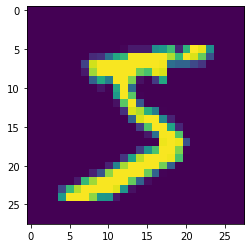

5


In [25]:
plt.imshow(xtrain[0])
plt.show()

print(ytrain[0])

In [26]:
# flatten the image, 28 * 28 = 784
xtrain_flatten= xtrain.reshape(-1,784)

xtest_flatten = xtest.reshape(-1,784)
xtrain_flatten[1].shape

(784,)

In [ ]:
xtrain[1]

**Build and Compile Model**

In [32]:
# build model
# sequential
model = keras.Sequential([
      # keras.layers.Dence(output layer shape-10, input layer shape-784, activation function                    
      keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')                    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain_flatten, ytrain, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4717 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9257


**Model Evaluation**

In [33]:
model.evaluate(xtest_flatten, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.9257


[0.2660009264945984, 0.9257000088691711]

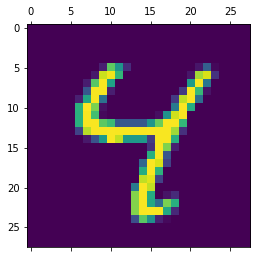

In [38]:
plt.matshow(xtest[6])

In [39]:
ytest_predict = model.predict(xtest_flatten)
ytest_predict[6]

array([5.2875280e-04, 6.6644410e-05, 2.5165081e-04, 4.5178890e-02,
       9.9760705e-01, 5.5516291e-01, 1.1685669e-02, 2.5960699e-01,
       7.6651478e-01, 7.9700637e-01], dtype=float32)

In [40]:
np.argmax(ytest_predict[6])

4

In [47]:
ytest[:3]

array([7, 2, 1], dtype=uint8)

In [43]:
ytest_predict[0]

array([1.1898905e-02, 3.0014675e-07, 4.3460399e-02, 9.3866587e-01,
       2.0176470e-03, 8.1848413e-02, 6.9855059e-07, 9.9973142e-01,
       6.3872546e-02, 5.2501637e-01], dtype=float32)

In [48]:
# max value index for each value of ytest_predict
ytest_predict_lables = [np.argmax(i) for i in ytest_predict]
ytest_predict_lables[:3]

[7, 2, 1]

**Confusion Matrix**

In [50]:

confiusion_matrix = tf.math.confusion_matrix(labels=ytest,predictions=ytest_predict_lables)
confiusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    6,    5,    2,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  933,   16,   10,    2,   11,    9,   32,    4],
       [   4,    0,   24,  916,    0,   30,    2,   10,   16,    8],
       [   1,    2,    5,    1,  926,    0,    8,    2,    9,   28],
       [  10,    4,    5,   29,   10,  778,   11,    9,   29,    7],
       [  13,    3,    8,    1,    7,   15,  907,    2,    2,    0],
       [   1,    8,   27,    5,    9,    0,    0,  945,    2,   31],
       [   6,   10,    8,   21,    9,   28,    9,   14,  862,    7],
       [  10,    7,    1,    9,   36,    7,    0,   25,    5,  909]],
      dtype=int32)>

**Confusion Matrix using Seaborn**

Text(69.0, 0.5, 'Truth')

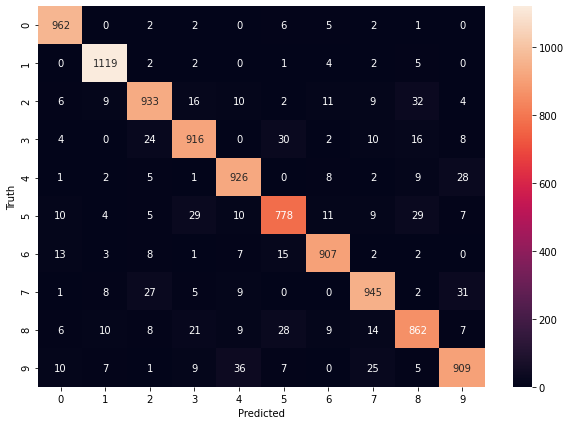

In [53]:

plt.figure(figsize = (10,7))
sn.heatmap(confiusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using 1 Hidden Layer in Neural Network

In [55]:
# build model
# sequential
model = keras.Sequential([
      # 1 hidden layer shape 100 node, activation = rectified linear unit (y = max(0, x))
      keras.layers.Dense(100, input_shape=(784,), activation='relu'),
      # output layer shape-10, input layer shape-autometic, activation function                    
      keras.layers.Dense(10, activation='sigmoid')                    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain_flatten, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2778 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1269 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9837


**Evaluation of model**
- Accuracy improved from 92% to 97% using 1 hidden layer

In [56]:
model.evaluate(xtest_flatten, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9757


[0.08031907677650452, 0.9757000207901001]

In [57]:
ytest_predict = model.predict(xtest_flatten)
ytest_predict_lables = [np.argmax(i) for i in ytest_predict]

Text(69.0, 0.5, 'Truth')

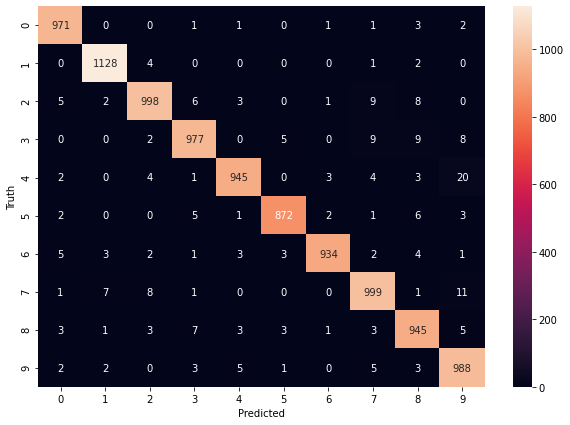

In [58]:
confiusion_matrix = tf.math.confusion_matrix(labels=ytest,predictions=ytest_predict_lables)
plt.figure(figsize = (10,7))
sn.heatmap(confiusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')